6-QUBIT TROTTERIZED XX+YY MIXER
Demonstrating why trotterization creates lengthy gate chains
Configuration: 3 Trotter steps on 6-qubit ring
Gate sequence: (0,1)→(1,2)→(2,3)→(3,4)→(4,5)→(5,0) × 3
Total gates: 18 XX+YY gates in sequence
No parallelization possible due to shared qubits
✓ Saved Trotterized XX+YY circuit as '6qubit_trotterized_xxplusyy_mixer.png'


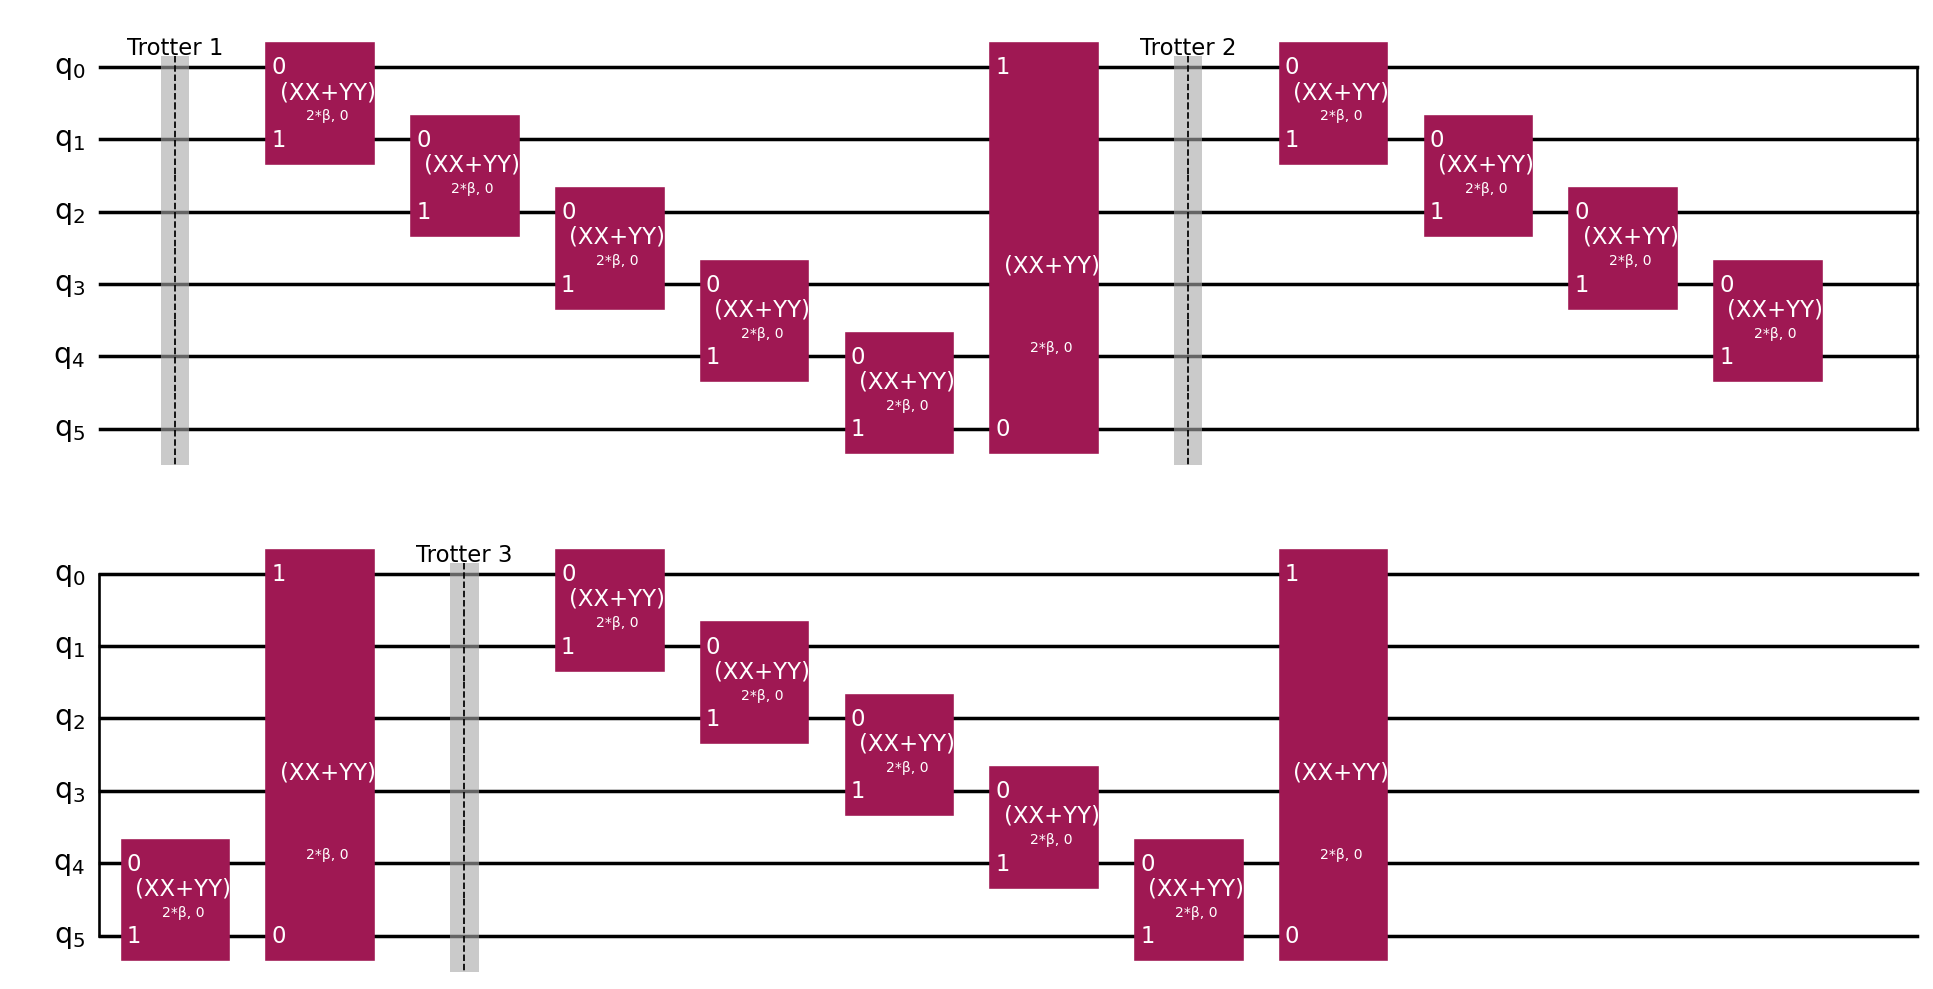


Trotterized XX+YY Circuit text representation (first 500 chars):
      Trotter 1 ┌─────────────────┐                                      »
q_0: ─────░─────┤0                ├──────────────────────────────────────»
          ░     │  (XX+YY)(2*β,0) │┌─────────────────┐                   »
q_1: ─────░─────┤1                ├┤0                ├───────────────────»
          ░     └─────────────────┘│  (XX+YY)(2*β,0) │┌─────────────────┐»
q_2: ─────░────────────────────────┤1                ├┤0                ├»
          ░                        └──────────────... [truncated - very long!]

TROTTERIZED XX+YY MIXER EFFECT:
Using β = π/8 and 3 Trotter steps
Testing with initial state |000001⟩

Initial state: |000001⟩

After 3 Trotter steps of XX+YY mixer:
  |010000⟩: 0.528
  |000001⟩: 0.258
  |001000⟩: 0.091
  |000010⟩: 0.080
  |000100⟩: 0.042

TROTTERIZED APPROACH EXPLANATION:
GATE SEQUENCE (3 Trotter Steps):
  Trotter 1: (0,1) → (1,2) → (2,3) → (3,4) → (4,5) → (5,0)
  Trotter 2: (0,1) → 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter

# Fix font warnings
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['mathtext.default'] = 'regular'

def create_xxplusyy_interaction(qc, qubit1, qubit2, beta_param):
    """Add a single XX+YY interaction between two qubits."""
    # XX+YY gate can be implemented as a combination of Rxx and Ryy
    # or using the native XX+YY gate if available
    try:
        # Try to use native XX+YY gate (newer Qiskit versions)
        from qiskit.circuit.library import XXPlusYYGate
        qc.append(XXPlusYYGate(2*beta_param), [qubit1, qubit2])
    except ImportError:
        # Fallback: implement XX+YY as Rxx + Ryy combination
        qc.rxx(beta_param, qubit1, qubit2)
        qc.ryy(beta_param, qubit1, qubit2)

def create_6qubit_trotterized_xxplusyy_mixer(beta=np.pi/8, n_trotter=3):
    """Create the 6-qubit trotterized XX+YY mixer (without even/odd - creates long chains)."""
    
    qc = QuantumCircuit(6, name='6Q_Trotterized_XXplusYY_Mixer')
    
    # Create symbolic parameter for display
    beta_param = Parameter('β')
    
    # TROTTERIZED LAYERS: Sequential XX+YY gates (no parallelization)
    for trotter_step in range(n_trotter):
        qc.barrier(label=f'Trotter {trotter_step+1}')
        
        # Apply XX+YY to all neighboring pairs sequentially
        # (0,1) - First connection
        create_xxplusyy_interaction(qc, 0, 1, beta_param)
        
        # (1,2) - Second connection
        create_xxplusyy_interaction(qc, 1, 2, beta_param)
        
        # (2,3) - Third connection
        create_xxplusyy_interaction(qc, 2, 3, beta_param)
        
        # (3,4) - Fourth connection
        create_xxplusyy_interaction(qc, 3, 4, beta_param)
        
        # (4,5) - Fifth connection
        create_xxplusyy_interaction(qc, 4, 5, beta_param)
        
        # (5,0) - Sixth connection - CLOSES THE RING!
        create_xxplusyy_interaction(qc, 5, 0, beta_param)
    
    # For simulation, we need to bind the parameter to actual values
    try:
        qc_bound = qc.assign_parameters({beta_param: beta})
    except AttributeError:
        # Fallback: create a separate numerical circuit
        qc_bound = QuantumCircuit(6, name='6Q_Trotterized_XXplusYY_Mixer_Bound')
        
        for trotter_step in range(n_trotter):
            qc_bound.barrier()
            create_xxplusyy_interaction(qc_bound, 0, 1, beta)
            create_xxplusyy_interaction(qc_bound, 1, 2, beta)
            create_xxplusyy_interaction(qc_bound, 2, 3, beta)
            create_xxplusyy_interaction(qc_bound, 3, 4, beta)
            create_xxplusyy_interaction(qc_bound, 4, 5, beta)
            create_xxplusyy_interaction(qc_bound, 5, 0, beta)
    
    return qc, qc_bound

def plot_trotterized_circuit():
    """Plot the trotterized XX+YY mixer circuit."""
    
    # Create trotterized circuit
    qc_trotterized, qc_trotterized_bound = create_6qubit_trotterized_xxplusyy_mixer()
    
    # Plot Trotterized XX+YY circuit (will be very long!)
    try:
        fig, ax = plt.subplots(figsize=(30, 10))  # Extra wide for long chain
        qc_trotterized.draw(output='mpl', ax=ax, style='default', fold=None, scale=0.6)
        
        plt.tight_layout()
        plt.savefig('6qubit_trotterized_xxplusyy_mixer.png', dpi=600, bbox_inches='tight', 
                    facecolor='white', edgecolor='none')
        
        print("✓ Saved Trotterized XX+YY circuit as '6qubit_trotterized_xxplusyy_mixer.png'")
        plt.show()
        
    except Exception as e:
        print(f"Failed to plot Trotterized XX+YY circuit: {e}")
    
    # Show text representation (truncated due to length)
    print("\nTrotterized XX+YY Circuit text representation (first 500 chars):")
    circuit_text = str(qc_trotterized.draw(output='text'))
    print(circuit_text[:500] + "... [truncated - very long!]")
    
    return qc_trotterized, qc_trotterized_bound

def demonstrate_trotterized_effect():
    """Demonstrate what the trotterized XX+YY mixer does."""
    
    try:
        # Try newer Qiskit first
        from qiskit_aer import Aer
        from qiskit import transpile
        use_aer = True
    except ImportError:
        try:
            # Try older Qiskit
            from qiskit import Aer
            from qiskit import transpile
            use_aer = True
        except ImportError:
            # Fall back to basic quantum_info
            from qiskit.quantum_info import Statevector
            use_aer = False
    
    print("\nTROTTERIZED XX+YY MIXER EFFECT:")
    print("="*40)
    print("Using β = π/8 and 3 Trotter steps")
    print("Testing with initial state |000001⟩")
    print()
    
    initial_state = '000001'
    
    # Test trotterized mixer
    qc_trotter = QuantumCircuit(6)
    for i, bit in enumerate(initial_state):
        if bit == '1':
            qc_trotter.x(i)
    
    _, trotterized_mixer_bound = create_6qubit_trotterized_xxplusyy_mixer(beta=np.pi/8, n_trotter=3)
    qc_trotter = qc_trotter.compose(trotterized_mixer_bound)
    
    if use_aer:
        backend = Aer.get_backend('statevector_simulator')
        transpiled_trotter = transpile(qc_trotter, backend)
        job_trotter = backend.run(transpiled_trotter)
        result_trotter = job_trotter.result()
        statevector_trotter = result_trotter.get_statevector()
    else:
        statevector_trotter = Statevector.from_instruction(qc_trotter)
    
    print(f"Initial state: |{initial_state}⟩")
    print()
    
    # Show trotterized results
    print("After 3 Trotter steps of XX+YY mixer:")
    probs_trotter = np.abs(statevector_trotter)**2
    top_indices_trotter = np.argsort(probs_trotter)[-8:][::-1]  # Show top 8
    
    for idx in top_indices_trotter:
        if probs_trotter[idx] > 0.001:
            binary_state = format(idx, '06b')
            print(f"  |{binary_state}⟩: {probs_trotter[idx]:.3f}")

def explain_trotterized_approach():
    """Explain the trotterized approach and why it creates long chains."""
    
    print("\nTROTTERIZED APPROACH EXPLANATION:")
    print("="*40)
    
    print("GATE SEQUENCE (3 Trotter Steps):")
    print("  Trotter 1: (0,1) → (1,2) → (2,3) → (3,4) → (4,5) → (5,0)")
    print("  Trotter 2: (0,1) → (1,2) → (2,3) → (3,4) → (4,5) → (5,0)")
    print("  Trotter 3: (0,1) → (1,2) → (2,3) → (3,4) → (4,5) → (5,0)")
    print("  Total: 18 XX+YY gates in sequence!")
    print()
    
    print("WHY NO PARALLELIZATION?")
    print("  • Gates share qubits: (0,1) and (1,2) both use qubit 1")
    print("  • Cannot run simultaneously due to qubit conflicts")
    print("  • Must wait for each gate to complete before next")
    print("  • Creates very long sequential chains")
    print()
    
    print("CIRCUIT CHARACTERISTICS:")
    print("  • Circuit Width: 6 qubits")
    print("  • Circuit Depth: 18 (very deep!)")
    print("  • Gate Count: 18 XX+YY gates")
    print("  • Parallelization: None possible")
    print("  • Execution Time: 18 × gate_time")
    print()
    
    print("RING CONNECTIVITY:")
    print("  • Each Trotter step covers all ring edges")
    print("  • Path: 0→1→2→3→4→5→0 (full ring)")
    print("  • Multiple repetitions strengthen mixing")
    print("  • But at cost of circuit depth!")

def visualize_trotterized_connectivity():
    """Create a visual representation of the trotterized connectivity pattern."""
    
    print("\nTROTTERIZED CONNECTIVITY VISUALIZATION:")
    print("="*45)
    
    print("Ring Layout:")
    print("  q0 ────── q1")
    print("   │         │")
    print("   │    q2 ─ q3")
    print("   │     │   │")
    print("   │     │   │")
    print("   └─ q5 ─── q4")
    print()
    
    print("Gate Application Order (per Trotter step):")
    print("  Step 1: XX+YY(0,1)")
    print("  Step 2: XX+YY(1,2)  ← cannot run with step 1 (shared qubit 1)")
    print("  Step 3: XX+YY(2,3)  ← cannot run with step 2 (shared qubit 2)")
    print("  Step 4: XX+YY(3,4)  ← cannot run with step 3 (shared qubit 3)")
    print("  Step 5: XX+YY(4,5)  ← cannot run with step 4 (shared qubit 4)")
    print("  Step 6: XX+YY(5,0)  ← cannot run with step 5 (shared qubit 5)")
    print()
    print("Result: All 6 gates must run sequentially!")
    print("Repeated 3 times = 18 sequential gates total")

def main():
    """Generate and demonstrate the trotterized mixer."""
    
    print("6-QUBIT TROTTERIZED XX+YY MIXER")
    print("="*40)
    print("Demonstrating why trotterization creates lengthy gate chains")
    print("Configuration: 3 Trotter steps on 6-qubit ring")
    print("Gate sequence: (0,1)→(1,2)→(2,3)→(3,4)→(4,5)→(5,0) × 3")
    print("Total gates: 18 XX+YY gates in sequence")
    print("No parallelization possible due to shared qubits")
    print()
    
    # Plot the trotterized circuit
    circuits = plot_trotterized_circuit()
    
    # Demonstrate the effect
    demonstrate_trotterized_effect()
    
    # Explain the approach
    explain_trotterized_approach()
    
    # Show connectivity
    visualize_trotterized_connectivity()
    
    print("\n" + "="*40)
    print("TROTTERIZED CIRCUIT ANALYSIS:")
    print("✗ Very deep circuit (depth = 18)")
    print("✗ No gate parallelization possible")
    print("✗ Long execution time on quantum hardware")
    print("✗ More susceptible to noise and decoherence")
    print("✓ Simple to implement")
    print("✓ Provides thorough mixing (3 repetitions)")
    print()
    print("This demonstrates why even/odd layering")
    print("is crucial for efficient QAOA implementations!")
    print("Even/odd would reduce this to just 2 parallel layers.")

if __name__ == "__main__":
    main()